In [1]:
import pandas as pd
from pyarrow import csv
import seaborn as sns 
data = pd.read_csv('usa_00002.csv.gz')
df = pd.DataFrame(data)
# df_new = pa.df.from_pandas(df)

In [3]:
df_ind = pd.read_csv('./2017-industry-code-list.csv')
df_ind = df_ind.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 4'], axis=1)
df_ind = df_ind.dropna()
df_ind = df_ind.rename(columns={'2017 Industry Code List': 'IND_NAME', 'Unnamed: 3':'IND'})
df['IND'] = df['IND'].astype(str)
df_ind.head()
df = pd.merge(df, df_ind, on='IND', how='left')
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,GRADEATT,GRADEATTD,EMPSTAT,EMPSTATD,IND,INCTOT,IND_NAME
0,2008,200801,1,23,57.0,2008000000011,130001,1,1,55.0,11,114,0,0,1,10,7870,58100,"Colleges, universities, and professional schoo..."
1,2008,200801,1,23,57.0,2008000000011,130001,1,2,49.0,10,101,0,0,3,30,0,0,NaN
2,2008,200801,1,23,57.0,2008000000011,130001,1,3,52.0,1,16,3,34,0,0,0,9999999,NaN
3,2008,200801,1,23,57.0,2008000000011,130001,1,4,52.0,1,12,2,20,0,0,0,9999999,NaN
4,2008,200801,2,39,113.0,2008000000021,90101,1,1,109.0,11,114,0,0,1,10,6870,75000,Banking and related activities


In [4]:
df_filtered = df[df['IND'] != 0]

In [22]:
# Group by 'YEAR' and 'IND' and count occurrences
job_counts = df_filtered.groupby(['YEAR', 'IND_NAME']).size().reset_index(name='Count')

# Sort the DataFrame by 'IND' and 'YEAR' to ensure consecutive years for each industry
job_counts_sorted = job_counts.sort_values(by=['IND_NAME', 'YEAR'])

# Calculate the increase in value for each industry each year
job_counts_sorted['IncreaseRate'] = (job_counts_sorted.groupby('IND_NAME')['Count'].pct_change()) * 100

# Function to get the top 5 increasing industries for each year
def top5_increasing_industries(year_df):
    return year_df.nlargest(5, 'IncreaseRate')

# Apply the function to each group (year)
top5_each_year = job_counts_sorted.groupby('YEAR').apply(top5_increasing_industries)

pd.set_option('display.max_rows', None)
top5_each_year.head(75)


YEAR                                           IND_NAME  Count  \
YEAR                                                                        
2008 0     2008  Accounting, tax preparation, bookkeeping, and ...  12965   
     1     2008  Administration of economic programs and space ...   6823   
     2     2008  Administration of environmental quality and ho...   3640   
     3     2008        Administration of human resource programs    10176   
     4     2008  Advertising, public relations, and related ser...   6100   
2009 474   2009  Unemployed, last worked 5 years ago or earlier...  16267   
     338   2009  Internet publishing and broadcasting and web s...    675   
     383   2009                      Not specified food industries    479   
     461   2009  Telecommunications, except wired telecommunica...   4308   
     304   2009          Electric and gas, and other combinations    1274   
2010 630   2010                           Not specified utilities     358   
     626   2010                      Not specified food industries    677   
     487   2010  Administration of economic programs and space ...   9724   
     503   2010                 Armed Forces, Branch not specified    460   
     619   2010       National security and international affairs   12445   
2011 959   2011                                         U. S. Navy   2668   
     803   2011                     Fishing, hunting and trapping    1064   
     957   2011                                  U. S. Coast Guard    433   
     917   2011          Recyclable material merchant wholesalers    1804   
     916   2011  Recreational vehicle parks and camps, and room...   3172   
2012 1067  2012  Internet publishing and broadcasting and web s...    958   
     1027  2012              Cutlery and hand tool manufacturing      559   
     1022  2012      Computer systems design and related services   20241   
     1188  2012                     Support activities for mining    6103   
     1120  2012                          Offices of chiropractors    1719   
2013 1431  2013                                Software publishers   1206   
     1383  2013  Other information services, except libraries a...    588   
     1358  2013  Navigational, measuring, electromedical, and c...   3564   
     1376  2013                            Oil and gas extraction    1292   
     1221  2013              Agricultural chemical manufacturing      483   
2014 1635  2014  Other information services, except libraries a...    965   
     1683  2014                                Software publishers   1819   
     1476  2014                   Aircraft and parts manufacturing   5408   
     1672  2014             Scenic and sightseeing transportation     564   
     1628  2014                            Oil and gas extraction    1564   
2015 1820  2015  Internet publishing and broadcasting and web s...   1215   
     1794  2015                Farm supplies merchant wholesalers     701   
     1851  2015         Miscellaneous petroleum and coal products     342   
     1836  2015            Management of companies and enterprises   1564   
     1837  2015           Management of companies and enterprises    1564   
2016 2096  2016                Military Reserves or National Guard    344   
     2119  2016                      Not specified food industries    333   
     2072  2016  Internet publishing and broadcasting and web s...   1579   
     2217  2016                           Warehousing and storage    6679   
     2088  2016            Management of companies and enterprises   1980   
2017 2449  2017                        Taxi and limousine service    5128   
     2451  2017  Textile and fabric finishing and fabric coatin...    202   
     2469  2017                           Warehousing and storage    7984   
     2340  2017            Management of companies and enterprises   2338   
     2341  2017           Management of companies and enterprises    2338   
2018 26

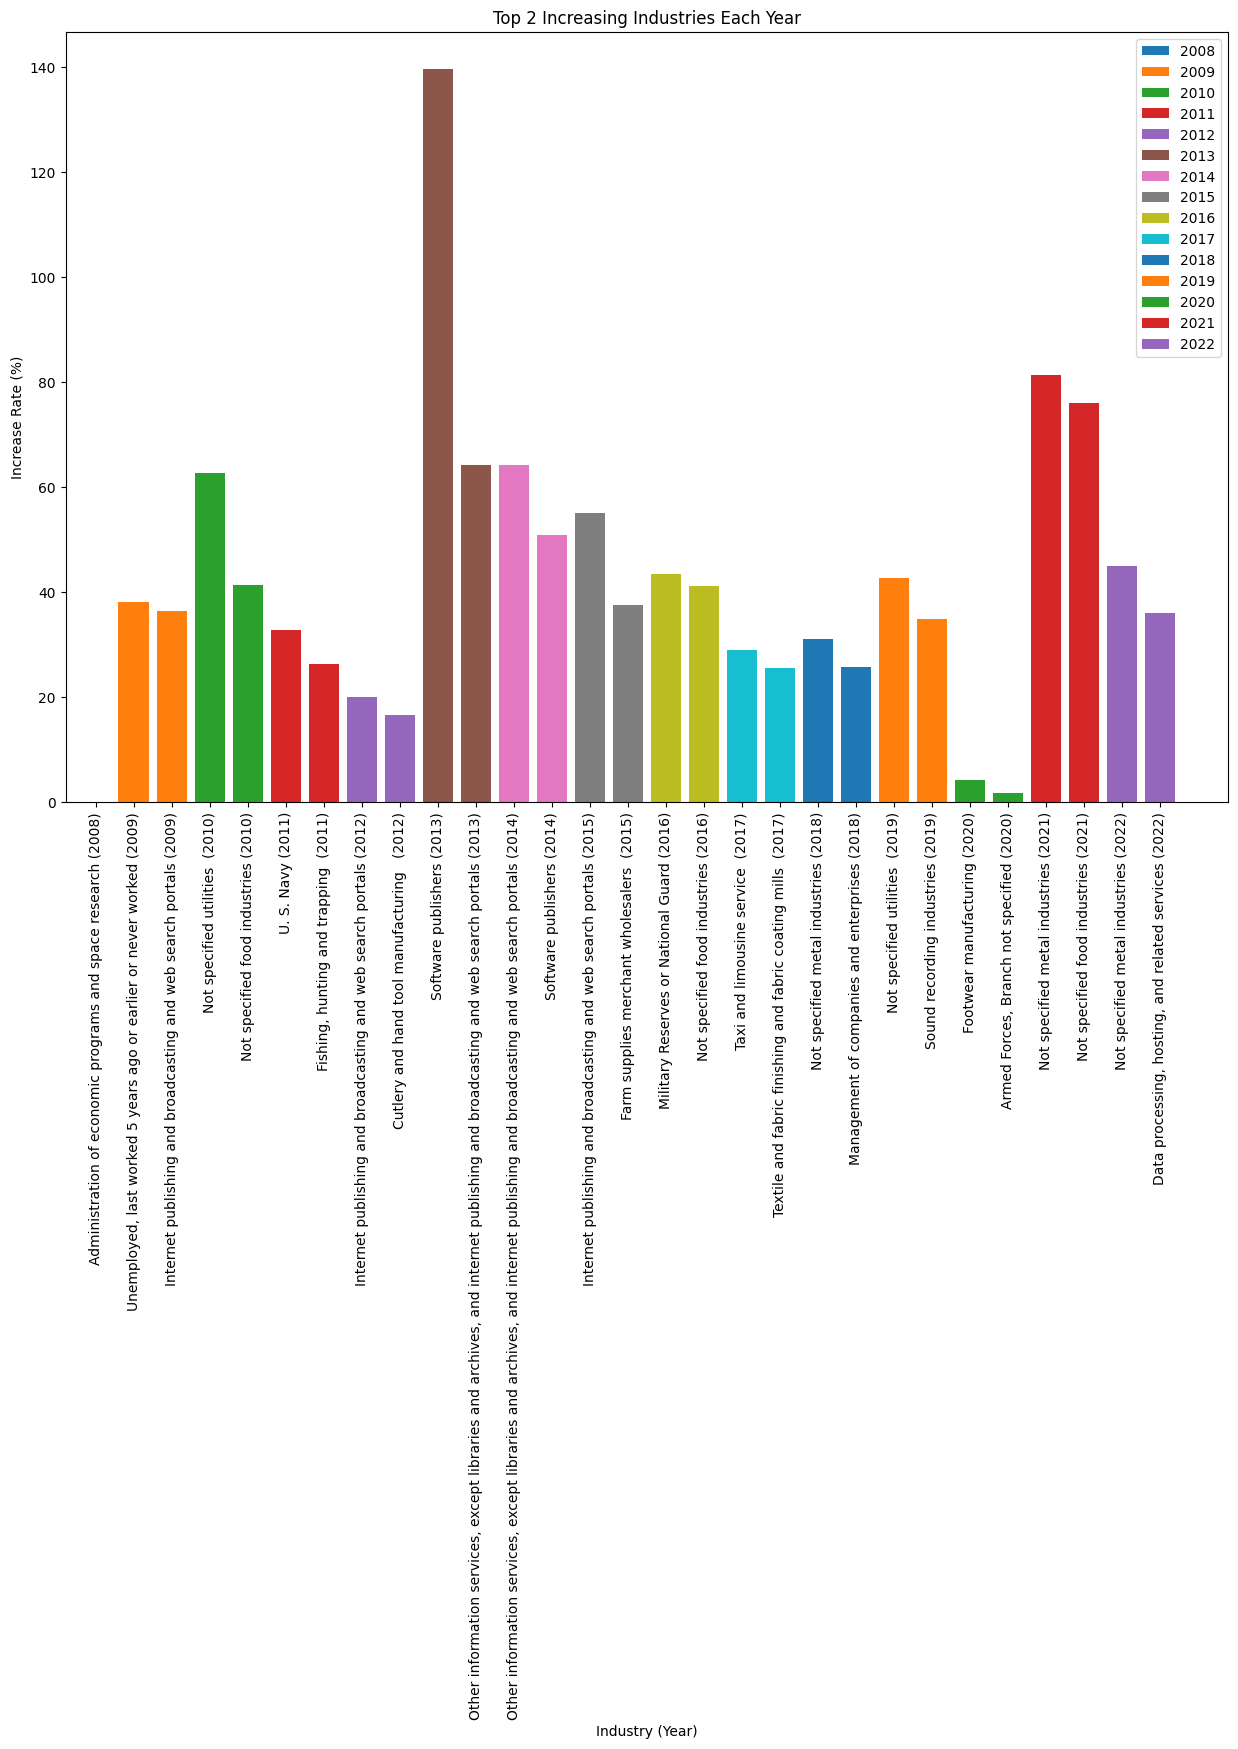

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 10))

# Get the unique years and sort them
years = sorted(top5_each_year['YEAR'].unique())

# Loop through each year and plot the top 5 industries
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = top5_each_year[top5_each_year['YEAR'] == year]
    
    # Plot the data, shift the bars for each year for better visibility
    ax.bar(year_data['IND_NAME'] + f' ({year})', year_data['IncreaseRate'], label=year)

# Set the title and labels
ax.set_title('Top 2 Increasing Industries Each Year')
ax.set_xlabel('Industry (Year)')
ax.set_ylabel('Increase Rate (%)')

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
